In [14]:
import pandas_datareader as pdr

In [15]:
import pandas as pd

In [16]:
df =pd.read_csv("C:\\Users\\user\\Downloads\\stock.csv")

In [17]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [18]:
df1 = df.reset_index()['Close']

In [19]:
df1.shape

(2035,)

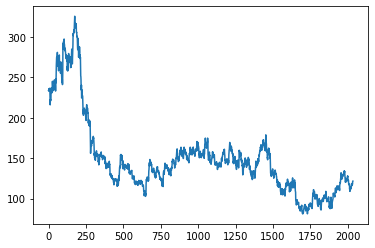

In [20]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [21]:
#Lstm are very sensitive to the scale of data,so we minmax scaler

In [22]:
import numpy as np

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [24]:
df1.shape

(2035, 1)

In [25]:
#Train and test
training_size=int(len(df1)*0.65) 
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [26]:
training_size,test_size

(1322, 713)

In [27]:
import numpy
#convert an array of values into a datset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY =[], []
    for i in range (len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0] 
        dataX.append(a)
        dataY.append(dataset[i +time_step,0])
    return numpy.array(dataX),numpy.array(dataY)
    

In [28]:
#reshape intoX=t,t+1,t+2,t+3,t+4
time_step=100
X_train,y_train =create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)


In [29]:
print(X_train)

[[0.62418301 0.62214052 0.62622549 ... 0.83455882 0.86213235 0.85273693]
 [0.62214052 0.62622549 0.63378268 ... 0.86213235 0.85273693 0.87111928]
 [0.62622549 0.63378268 0.62234477 ... 0.85273693 0.87111928 0.84497549]
 ...
 [0.34517974 0.31781046 0.33047386 ... 0.2816585  0.27001634 0.26531863]
 [0.31781046 0.33047386 0.32128268 ... 0.27001634 0.26531863 0.27389706]
 [0.33047386 0.32128268 0.34007353 ... 0.26531863 0.27389706 0.25347222]]


In [30]:
print(X_test.shape),print(y_test.shape)

(612, 100)
(612,)


(None, None)

In [31]:
#reshape input to be which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [32]:
###Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 22s 416ms/step - loss: 0.0346 - val_loss: 0.0029
Epoch 2/100
20/20 [==============================] - 6s 290ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 3/100
20/20 [==============================] - 6s 285ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 4/100
20/20 [==============================] - 5s 250ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 5/100
20/20 [==============================] - 6s 286ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 6/100
20/20 [==============================] - 6s 293ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 7/100
20/20 [==============================] - 5s 252ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/100
20/20 [==============================] - 6s 284ms/step - loss: 0.0013 - val_loss: 9.7909e-04
Epoch 9/100
20/20 [==============================] - 6s 283ms/step - loss: 0.0013 - val_loss: 9.9889e-04
Epoch 10/100
20/20 [==============================] - 5s 240ms/step - loss: 0.0011

20/20 [==============================] - 6s 271ms/step - loss: 3.1207e-04 - val_loss: 3.3417e-04
Epoch 77/100
20/20 [==============================] - 6s 278ms/step - loss: 3.2434e-04 - val_loss: 3.7184e-04
Epoch 78/100
20/20 [==============================] - 5s 245ms/step - loss: 3.1221e-04 - val_loss: 2.9280e-04
Epoch 79/100
20/20 [==============================] - 5s 247ms/step - loss: 2.9965e-04 - val_loss: 3.7934e-04
Epoch 80/100
20/20 [==============================] - 5s 261ms/step - loss: 3.0191e-04 - val_loss: 2.9780e-04
Epoch 81/100
20/20 [==============================] - 4s 226ms/step - loss: 2.8826e-04 - val_loss: 2.7124e-04
Epoch 82/100
20/20 [==============================] - 4s 219ms/step - loss: 2.8917e-04 - val_loss: 3.3150e-04
Epoch 83/100
20/20 [==============================] - 5s 266ms/step - loss: 3.4076e-04 - val_loss: 2.7082e-04
Epoch 84/100
20/20 [==============================] - 6s 281ms/step - loss: 2.7358e-04 - val_loss: 3.7211e-04
Epoch 85/100
20/20 [===

In [37]:
import tensorflow as tf

In [38]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

20/20 [==============================] - 1s 35ms/step


In [40]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [41]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

164.65741536987358

In [43]:
##test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))


115.74425489185285

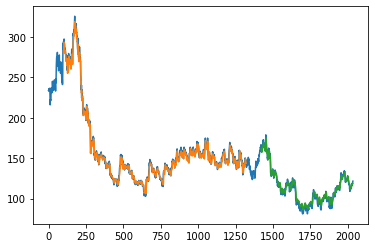

In [45]:
###plotting 
#shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+ look_back,:]=train_predict
#shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()